# Unsteady-State Material Balances

by Jeffrey Kantor  (jeff at nd.edu). The latest version of this notebook is available at [https://github.com/jckantor/CBE20255](https://github.com/jckantor/CBE20255). 

### Summary

This [Jupyter notebook](http://jupyter.org/notebook.html) demonstrates the application of the general material balance equations to a variety of example problems.

## Unsteady-State Material Balances

The general principle of material balances is stated in words as 

Accumulation = Inflow - Outflow + Generation - Consumption

An equation like this can be written for any conserved quantity, whether it is chemical species that chemical or bio engineers work with, or moeny in the case of finance, or populations for social scientists. Whenever terms on the right-hand side of the equation do not yield a zero result we are left with an _unsteady-state_ balance, which are some of the most fascinating and challenging problems in engineering practice.

## Example 1: Population Growth

The first example concerns population growth. Looking birth and death rates in various countries around the globe, one comes across the following data maintained by the World Bank.

For Afghanistan (the first country on the World Bank charts), the 2011 population was estimated to be 29,105,480 with a [birth rate of 37.0 births per year per 1,000 people](http://data.worldbank.org/indicator/SP.DYN.CBRT.IN), and a [death rate as 8.0 per year per 1,000](http://data.worldbank.org/indicator/SP.DYN.CDRT.IN). Assuming there is no in-migration or out-migration, can we predict the population in 2014?

### Population Balance Equation

Writing out the balance equation, we get

$\underbrace{\mbox{Accumulation}}_{\frac{dP}{dt}} = \underbrace{\mbox{Inflow}}_{=0} - \underbrace{\mbox{Outflow}}_{=0} + \underbrace{\mbox{Generation}}_{births=\frac{37}{1000}P} - \underbrace{\mbox{Consumption}}_{deaths=\frac{8}{1000}P}$

the algebraic combination of the two terms on the left leaves us an equation for the rate of change of population

$\frac{dP}{dt} = 0.029\,P$

with an initial condition $P(2011) = 29,105,480$. 

### Calculus Solution

We'll use the shorthand notation $t_0 = 2011$ and $P(t_0) = 29,105,480$. Then separating the variables

$\int_{P(t_0)}^{P(t)}\frac{1}{P}\,dP = 0.029\,\int_{t_0}^t dt $

Doing the integrals (if this is the first time you've seen this, be sure you do this by hand!) leads to

$P(t) = P(t_0)\,e^{0.029(t-t_0)}$

This solution demonstrates the exponential growth of populations in circumstances where growth rate is constant and there are no other factors to consider.

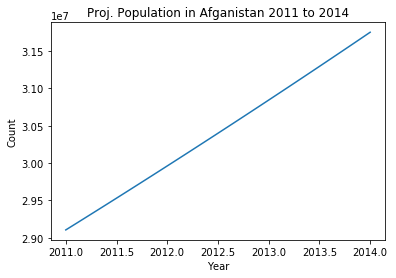

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

P_0 = 29105480
t_0 = 2011
t_1 = 2014

t = np.linspace(t_0,t_1)
P = P_0*np.exp(0.029*(t-t_0))

plt.plot(t,P)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title("Proj. Population in Afganistan {:4d} to {:4d}".format(t_0,t_1))

### Numerical Solution

Another way of generating solutons to unsteady-state problems is by direct, numerical solution of the differential equations. This requires us to set up a function to numerically evaluate the right hand-side of the differential equation. That function, along with initial conditions and a list of time values for which we want to the know the solution, are passed to a solver that does the hard work.

#### Step 1. Right a function to evaulate the RHS of the differential equation.

In [2]:
def Inflow(t) : return 0
def Outflow(t): return 0
def Births(P) : return (37.0/1000)*P
def Deaths(P) : return (8.0/1000)*P

def Accumulation(P,t) : return Inflow(t) - Outflow(t) + Births(P) - Deaths(P)

#### Step 2. Establish the initial condition and time values for a desired solution.

In [3]:
P_0 = 29105480
t_0 = 2011
t_1 = 2014
t = np.linspace(t_0,t_1)

#### Step 3. Pass this information to a solver to compute values of the solution.

The `SciPy` package provides a number of tools for the numerical solution of differential equations. Of these, perhaps the easiest to use is `odeint` which is demonstrated here. `odeint` needs to be imported from `scipy.integrate`, and then given three pieces of information:

1. A function that takes two arguments. The first argument is the value of quantity we're trying to integrate, and the second is time. The function must return the value of the right-hand side of the differential equations.
2. The initial value of the quantity we're trying to integrate.
3. A list of times at which we wish to evaluate the solution. The first value in the list must be the initial value of time.

In [4]:
P = odeint(Accumulation,P_0,t)

#### Step 4. Plot the result.

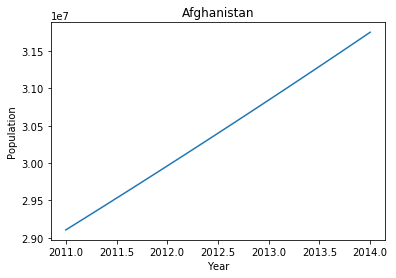

In [5]:
plt.plot(t,P)
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Afghanistan')

## Example 2: Dilution of a Trace Contaminant

We have a tank partially filled with an initial volume V(t<sub>0</sub>) = 1000 liters of water that is contaminated by a toxic species X at an concentration C<sub>X</sub>(t<sub>0</sub>) = 100 ppm by volume. We wish to dilute this to 20 ppm by volume before sending it for further cleanup.  We know adding 4000 liters of water would accomplish the goal, but for process monitoring purposes we'd like to compute concentration as a function of time assuming water enters at a steady rate of q(t) = 1 liter/second.

The total amount of X in the tank is the product of concentration times volume, that is C<sub>X</sub>V. The material balance for X is 

For component X: $\underbrace{\mbox{Accumulation}_X}_{\frac{d(C_XV)}{dt}} = \underbrace{\mbox{Inflow}_X}_{=0} - \underbrace{\mbox{Outflow}_X}_{=0} + \underbrace{\mbox{Generation}_X}_{=0} - \underbrace{\mbox{Consumption}_X}_{=0}$

This is a two component system, so we need two material balances. We'll do the second balance on overall volume on the assumption that density is a constant this dilute solution. The overall balance is

For total volume: $\underbrace{\mbox{Accumulation}}_{\frac{dV}{dt}} = \underbrace{\mbox{Inflow}}_{=q} - \underbrace{\mbox{Outflow}}_{=0} + \underbrace{\mbox{Generation}}_{=0} - \underbrace{\mbox{Consumption}}_{=0}$

This gives us a pair of differential equations

$\begin{align*}
\frac{d(C_XV)}{dt} & = 0 \\
\frac{dV}{dt} & = q
\end{align*}$

What we're looking for is C<sub>X</sub>. But what we have are differential equations for product (C<sub>X</sub>V) and volume V. How can we get a differential equation for C<sub>X</sub>?  

Using the chain rule

$\frac{d(C_XV)}{dt} = C_X\,\underbrace{\frac{dV}{dt}}_{=q} + V\,\frac{dC_X}{dt} = 0$

Substituting in the second equation leaves us with a pair of differential equations

$\begin{align*}
\frac{dC_X}{dt} & = -\frac{q}{V} C_X \\
\frac{dV}{dt} & = q
\end{align*}$

(Be sure you go through the algebra and understand both how and why we did this.)



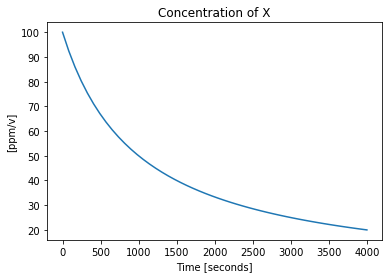

In [6]:
# parameter values
q = 1          # liters/second

# initial conditions
C_0 = 100      # ppm
V_0 = 1000     # liters

# time grid in seconds
t = np.linspace(0,4000)

# compute list of derivative values
def deriv(X,t):
    C,V = X
    return [-q*C/V,q]

# solve with odeint
soln = odeint(deriv,[C_0,V_0],t)

# display the result
plt.plot(t,soln[:,0])
plt.xlabel('Time [seconds]')
plt.ylabel('[ppm/v]')
plt.title('Concentration of X')

## Example 3: Hare and Lynx

![](files/images/Lynx-Hare_cycle.gif)

$\begin{align*}
\frac{dH}{dt} & = r H \left(1-\frac{H}{k}\right) - \frac{a H L}{c + H}\\
\frac{dL}{dt} & = \frac{b a H L}{c + H} - d L
\end{align*}$

### Parameter Values

In [7]:
a = 3.2
b = 0.6
c = 50
d = 0.56
k = 125
r = 1.6

### Derivatives

In [8]:
def deriv(x,t):
    H,L = x
    dH = r*H*(1-H/k) - a*H*L/(c+H)
    dL = b*a*H*L/(c+H) - d*L
    return [dH,dL]

### Solve

In [9]:
t = np.linspace(0,150,500)
ic = [20,30]
soln = odeint(deriv,ic,t)

### Plot

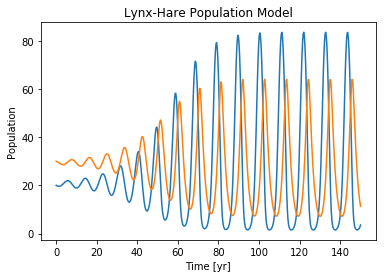

In [10]:
plt.plot(t,soln)
plt.xlabel('Time [yr]')
plt.ylabel('Population');
plt.title('Lynx-Hare Population Model')

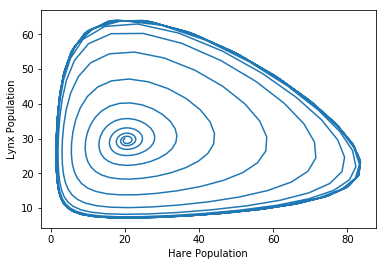

In [11]:
H = soln[:,0]
L = soln[:,1]
plt.plot(H,L)
plt.xlabel('Hare Population')
plt.ylabel('Lynx Population')